In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Preprocessor import Preprocessor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import datetime
today = str(datetime.datetime.now().date()).replace("-","")
print("오늘 날짜 : " + today)

오늘 날짜 : 20210425


In [2]:
preprocessor = Preprocessor()

Preprocessor is Operating


In [3]:
train_df = preprocessor.preprocessing('../data/train.csv')
test_df  = preprocessor.preprocessing('../data/test.csv')

In [4]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [5]:
X = train_df.drop('credit',axis=1)
y = train_df['credit']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
X_train = X_train.reset_index().drop(['index'],axis=1)
y_train = y_train.reset_index().drop(['index'],axis=1)

In [8]:
X_train

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,1,0,1,1,135000.0,26.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,3,140400.0,34.0,9.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,2,162000.0,35.0,4.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,1,157500.0,46.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,180000.0,40.0,9.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,0,0,1,1,337500.0,41.0,4.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21161,1,0,1,0,225000.0,39.0,19.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21162,0,1,1,2,103500.0,37.0,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21163,0,0,1,0,157500.0,50.0,4.0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [11]:
xgb_wrapper = XGBClassifier(n_estimators=5000, learning_rate=0.01, max_depth=12)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="mlogloss", 
                eval_set=evals, verbose=True)


[0]	validation_0-mlogloss:1.09389


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	validation_0-mlogloss:1.08925
[2]	validation_0-mlogloss:1.08464
[3]	validation_0-mlogloss:1.08016
[4]	validation_0-mlogloss:1.07574
[5]	validation_0-mlogloss:1.07139
[6]	validation_0-mlogloss:1.06711
[7]	validation_0-mlogloss:1.06286
[8]	validation_0-mlogloss:1.05872
[9]	validation_0-mlogloss:1.05465
[10]	validation_0-mlogloss:1.05059
[11]	validation_0-mlogloss:1.04662
[12]	validation_0-mlogloss:1.04268
[13]	validation_0-mlogloss:1.03885
[14]	validation_0-mlogloss:1.03507
[15]	validation_0-mlogloss:1.03133
[16]	validation_0-mlogloss:1.02764
[17]	validation_0-mlogloss:1.02403
[18]	validation_0-mlogloss:1.02047
[19]	validation_0-mlogloss:1.01698
[20]	validation_0-mlogloss:1.01352
[21]	validation_0-mlogloss:1.01015
[22]	validation_0-mlogloss:1.00684
[23]	validation_0-mlogloss:1.00355
[24]	validation_0-mlogloss:1.00031
[25]	validation_0-mlogloss:0.99714
[26]	validation_0-mlogloss:0.99399
[27]	validation_0-mlogloss:0.99087
[28]	validation_0-mlogloss:0.98786
[29]	validation_0-mlogloss:0.

[232]	validation_0-mlogloss:0.77569
[233]	validation_0-mlogloss:0.77549
[234]	validation_0-mlogloss:0.77527
[235]	validation_0-mlogloss:0.77507
[236]	validation_0-mlogloss:0.77487
[237]	validation_0-mlogloss:0.77468
[238]	validation_0-mlogloss:0.77451
[239]	validation_0-mlogloss:0.77428
[240]	validation_0-mlogloss:0.77410
[241]	validation_0-mlogloss:0.77389
[242]	validation_0-mlogloss:0.77369
[243]	validation_0-mlogloss:0.77351
[244]	validation_0-mlogloss:0.77334
[245]	validation_0-mlogloss:0.77316
[246]	validation_0-mlogloss:0.77297
[247]	validation_0-mlogloss:0.77279
[248]	validation_0-mlogloss:0.77263
[249]	validation_0-mlogloss:0.77246
[250]	validation_0-mlogloss:0.77230
[251]	validation_0-mlogloss:0.77214
[252]	validation_0-mlogloss:0.77197
[253]	validation_0-mlogloss:0.77180
[254]	validation_0-mlogloss:0.77164
[255]	validation_0-mlogloss:0.77149
[256]	validation_0-mlogloss:0.77132
[257]	validation_0-mlogloss:0.77117
[258]	validation_0-mlogloss:0.77102
[259]	validation_0-mlogloss:

[460]	validation_0-mlogloss:0.75694
[461]	validation_0-mlogloss:0.75692
[462]	validation_0-mlogloss:0.75684
[463]	validation_0-mlogloss:0.75684
[464]	validation_0-mlogloss:0.75682
[465]	validation_0-mlogloss:0.75677
[466]	validation_0-mlogloss:0.75672
[467]	validation_0-mlogloss:0.75673
[468]	validation_0-mlogloss:0.75666
[469]	validation_0-mlogloss:0.75666
[470]	validation_0-mlogloss:0.75660
[471]	validation_0-mlogloss:0.75657
[472]	validation_0-mlogloss:0.75652
[473]	validation_0-mlogloss:0.75647
[474]	validation_0-mlogloss:0.75645
[475]	validation_0-mlogloss:0.75643
[476]	validation_0-mlogloss:0.75642
[477]	validation_0-mlogloss:0.75640
[478]	validation_0-mlogloss:0.75638
[479]	validation_0-mlogloss:0.75637
[480]	validation_0-mlogloss:0.75636
[481]	validation_0-mlogloss:0.75633
[482]	validation_0-mlogloss:0.75631
[483]	validation_0-mlogloss:0.75629
[484]	validation_0-mlogloss:0.75628
[485]	validation_0-mlogloss:0.75627
[486]	validation_0-mlogloss:0.75625
[487]	validation_0-mlogloss:

[688]	validation_0-mlogloss:0.74955
[689]	validation_0-mlogloss:0.74956
[690]	validation_0-mlogloss:0.74956
[691]	validation_0-mlogloss:0.74954
[692]	validation_0-mlogloss:0.74955
[693]	validation_0-mlogloss:0.74955
[694]	validation_0-mlogloss:0.74953
[695]	validation_0-mlogloss:0.74952
[696]	validation_0-mlogloss:0.74949
[697]	validation_0-mlogloss:0.74949
[698]	validation_0-mlogloss:0.74946
[699]	validation_0-mlogloss:0.74947
[700]	validation_0-mlogloss:0.74944
[701]	validation_0-mlogloss:0.74939
[702]	validation_0-mlogloss:0.74935
[703]	validation_0-mlogloss:0.74932
[704]	validation_0-mlogloss:0.74930
[705]	validation_0-mlogloss:0.74928
[706]	validation_0-mlogloss:0.74927
[707]	validation_0-mlogloss:0.74925
[708]	validation_0-mlogloss:0.74926
[709]	validation_0-mlogloss:0.74923
[710]	validation_0-mlogloss:0.74922
[711]	validation_0-mlogloss:0.74921
[712]	validation_0-mlogloss:0.74918
[713]	validation_0-mlogloss:0.74916
[714]	validation_0-mlogloss:0.74918
[715]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

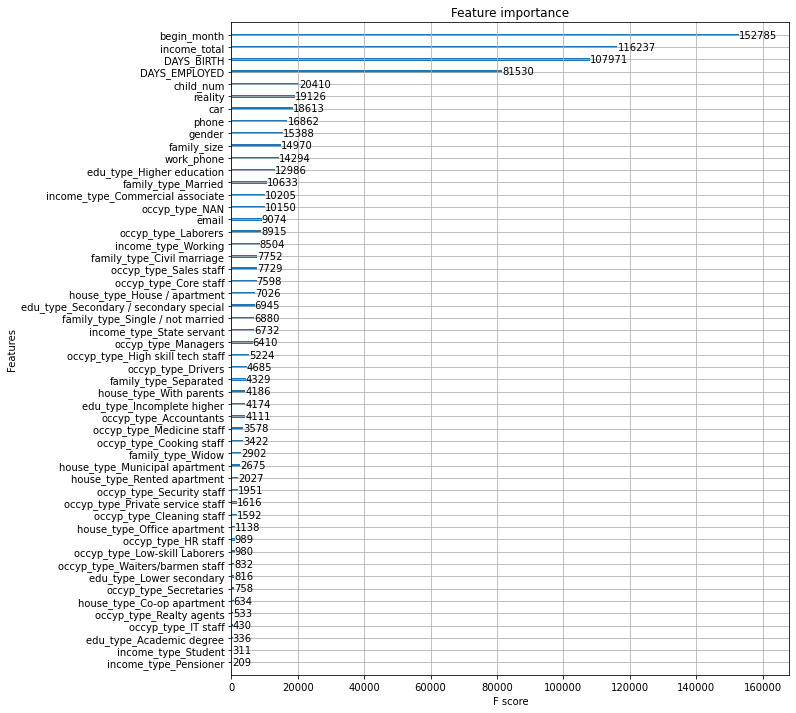

In [32]:
fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

In [15]:
X_train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'family_type_Civil marriage', 'family_type_Married',
       'family_type_Separated', 'family_type_Single / not married',
       'family_type_Widow', 'house_type_Co-op apartment',
       'house_type_House / apartment', 'house_type_Municipal apartment',
       'house_type_Office apartment', 'house_type_Rented apartment',
       'house_type_With parents', 'income_type_Commercial associate',
       'income_type_Pensioner', 'income_type_State servant',
       'income_type_Student', 'income_type_Working',
       'edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special', 'occyp_type_Accountants',
       'occyp_type_Cleaning staff', 'occyp_type_Cooking staff',
       'occyp_type_Core staff', 'occyp_type_Drivers', 'o

In [18]:
choosed_col = ['gender',  'income_total', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'email',  'begin_month',
        'family_type_Civil marriage',
       'house_type_Co-op apartment', 'house_type_House / apartment',
       'house_type_With parents', 'income_type_Commercial associate',
       'income_type_Pensioner', 'income_type_Working',
       'edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special', 'occyp_type_Accountants',
       'occyp_type_Cleaning staff',
       'occyp_type_Drivers', 'occyp_type_HR staff',
        'occyp_type_IT staff', 'occyp_type_Managers',
       'occyp_type_Medicine staff', 'occyp_type_NAN','occyp_type_Sales staff', 
       'occyp_type_Security staff']

X_train_choosed = X_train[choosed_col]
X_test_choosed  = X_test[choosed_col]

In [19]:
xgb_choosed_feature = XGBClassifier(n_estimators=5000, learning_rate=0.01, max_depth=12)
evals = [(X_test_choosed, y_test)]
xgb_choosed_feature.fit(X_train_choosed, y_train, early_stopping_rounds=50, eval_metric="mlogloss", 
                eval_set=evals, verbose=True)

[0]	validation_0-mlogloss:1.09391
[1]	validation_0-mlogloss:1.08932
[2]	validation_0-mlogloss:1.08479
[3]	validation_0-mlogloss:1.08032
[4]	validation_0-mlogloss:1.07594
[5]	validation_0-mlogloss:1.07165
[6]	validation_0-mlogloss:1.06739
[7]	validation_0-mlogloss:1.06322
[8]	validation_0-mlogloss:1.05912
[9]	validation_0-mlogloss:1.05509
[10]	validation_0-mlogloss:1.05112
[11]	validation_0-mlogloss:1.04723
[12]	validation_0-mlogloss:1.04339
[13]	validation_0-mlogloss:1.03962
[14]	validation_0-mlogloss:1.03588
[15]	validation_0-mlogloss:1.03224
[16]	validation_0-mlogloss:1.02864
[17]	validation_0-mlogloss:1.02511
[18]	validation_0-mlogloss:1.02165
[19]	validation_0-mlogloss:1.01822
[20]	validation_0-mlogloss:1.01486
[21]	validation_0-mlogloss:1.01154
[22]	validation_0-mlogloss:1.00827
[23]	validation_0-mlogloss:1.00506
[24]	validation_0-mlogloss:1.00192
[25]	validation_0-mlogloss:0.99877
[26]	validation_0-mlogloss:0.99571
[27]	validation_0-mlogloss:0.99270
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.78716
[232]	validation_0-mlogloss:0.78695
[233]	validation_0-mlogloss:0.78673
[234]	validation_0-mlogloss:0.78653
[235]	validation_0-mlogloss:0.78632
[236]	validation_0-mlogloss:0.78611
[237]	validation_0-mlogloss:0.78591
[238]	validation_0-mlogloss:0.78573
[239]	validation_0-mlogloss:0.78552
[240]	validation_0-mlogloss:0.78530
[241]	validation_0-mlogloss:0.78512
[242]	validation_0-mlogloss:0.78493
[243]	validation_0-mlogloss:0.78476
[244]	validation_0-mlogloss:0.78457
[245]	validation_0-mlogloss:0.78438
[246]	validation_0-mlogloss:0.78420
[247]	validation_0-mlogloss:0.78404
[248]	validation_0-mlogloss:0.78387
[249]	validation_0-mlogloss:0.78369
[250]	validation_0-mlogloss:0.78353
[251]	validation_0-mlogloss:0.78337
[252]	validation_0-mlogloss:0.78317
[253]	validation_0-mlogloss:0.78299
[254]	validation_0-mlogloss:0.78284
[255]	validation_0-mlogloss:0.78266
[256]	validation_0-mlogloss:0.78253
[257]	validation_0-mlogloss:0.78235
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.77072
[460]	validation_0-mlogloss:0.77071
[461]	validation_0-mlogloss:0.77069
[462]	validation_0-mlogloss:0.77066
[463]	validation_0-mlogloss:0.77065
[464]	validation_0-mlogloss:0.77062
[465]	validation_0-mlogloss:0.77059
[466]	validation_0-mlogloss:0.77057
[467]	validation_0-mlogloss:0.77055
[468]	validation_0-mlogloss:0.77053
[469]	validation_0-mlogloss:0.77052
[470]	validation_0-mlogloss:0.77049
[471]	validation_0-mlogloss:0.77047
[472]	validation_0-mlogloss:0.77048
[473]	validation_0-mlogloss:0.77048
[474]	validation_0-mlogloss:0.77047
[475]	validation_0-mlogloss:0.77045
[476]	validation_0-mlogloss:0.77040
[477]	validation_0-mlogloss:0.77040
[478]	validation_0-mlogloss:0.77035
[479]	validation_0-mlogloss:0.77031
[480]	validation_0-mlogloss:0.77026
[481]	validation_0-mlogloss:0.77025
[482]	validation_0-mlogloss:0.77022
[483]	validation_0-mlogloss:0.77022
[484]	validation_0-mlogloss:0.77018
[485]	validation_0-mlogloss:0.77014
[486]	validation_0-mlogloss:

[687]	validation_0-mlogloss:0.76850
[688]	validation_0-mlogloss:0.76851
[689]	validation_0-mlogloss:0.76854
[690]	validation_0-mlogloss:0.76855
[691]	validation_0-mlogloss:0.76858
[692]	validation_0-mlogloss:0.76858
[693]	validation_0-mlogloss:0.76860
[694]	validation_0-mlogloss:0.76859
[695]	validation_0-mlogloss:0.76862
[696]	validation_0-mlogloss:0.76864
[697]	validation_0-mlogloss:0.76864
[698]	validation_0-mlogloss:0.76868
[699]	validation_0-mlogloss:0.76869
[700]	validation_0-mlogloss:0.76867
[701]	validation_0-mlogloss:0.76865
[702]	validation_0-mlogloss:0.76868
[703]	validation_0-mlogloss:0.76872
[704]	validation_0-mlogloss:0.76871
[705]	validation_0-mlogloss:0.76875
[706]	validation_0-mlogloss:0.76873
[707]	validation_0-mlogloss:0.76875
[708]	validation_0-mlogloss:0.76876


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
test_df = test_df[choosed_col]
preds = xgb_wrapper.predict_proba(test_df)
preds = pd.DataFrame(preds)

index = pd.DataFrame(range(26457,36457),columns=["index"])
preds= pd.concat([index, preds], axis=1)

preds.to_csv('../submission/'+today+'_xgb_sub.csv', index =False)